In [2]:
import logging

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from scipy.spatial import distance

import pandas as pd

In [3]:
from metrics.metrics import accuracy
import knn

logging.basicConfig(level=logging.DEBUG)

In [4]:
# Generate a random binary classification problem.
#X, y = make_classification(
#    n_samples=1000, n_features=10, n_informative=5, random_state=1111, n_classes=2, class_sep=1.75
#)

# Convert y to {-1, 1}
#y = (y * 2) - 1
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [6]:
from sklearn.datasets import fetch_openml

dataset1 = fetch_openml(data_id=37)

X = dataset1.data
y = dataset1.target

# reduze the size of the dataset
#X = X[:700]
#y = y[:700]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [7]:
#print(dataset1)
feature_names = X.columns
id = 0
for feature in feature_names:
    print(str(id) + " :: " + feature + " " + str(X[feature].dtype))
    id = id + 1


0 :: preg int64
1 :: plas int64
2 :: pres int64
3 :: skin int64
4 :: insu int64
5 :: mass float64
6 :: pedi float64
7 :: age int64


In [8]:
print(len(X))
print(y)


768
0      tested_positive
1      tested_negative
2      tested_positive
3      tested_negative
4      tested_positive
            ...       
763    tested_negative
764    tested_negative
765    tested_negative
766    tested_positive
767    tested_negative
Name: class, Length: 768, dtype: category
Categories (2, object): ['tested_negative', 'tested_positive']


DEBUG:matplotlib:matplotlib data path: /home/francisco/pythonEnv/ac/lib/python3.11/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/francisco/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/francisco/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/francisco/.cache/matplotlib/fontlist-v330.json


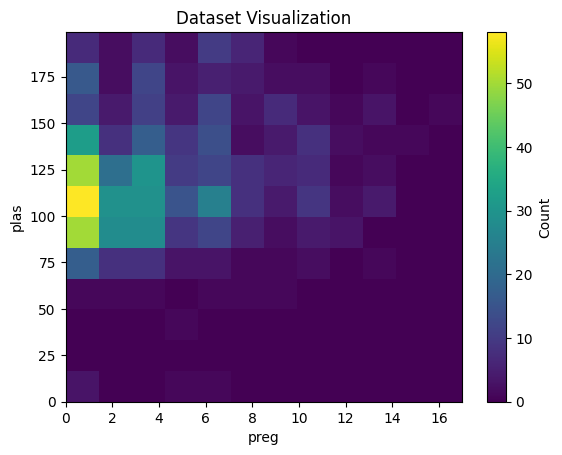

In [9]:
import matplotlib.pyplot as plt

logging.getLogger('matplotlib').setLevel(logging.WARNING)

def draw_data(X, y, xn, xy):
    # Convert y to numeric values if it's not already
    y = pd.to_numeric(y, errors='coerce')
    X = X.dropna(subset=[X.columns[xn], X.columns[xy]])

    # Create a 2D histogram
    plt.hist2d(X.iloc[:, xn], X.iloc[:, xy], bins=12, cmap='viridis')
    plt.title('Dataset Visualization')
    plt.xlabel(X.columns[xn])
    plt.ylabel(X.columns[xy])
    plt.colorbar(label='Count')
    plt.show()

draw_data(X, y, 0, 1)

In [11]:
def preprocess_data(X, y):
    # Convert categorical variables to dummy variables
    X = pd.get_dummies(X, drop_first=True)
    
    # Convert bool columns to int
    X = X.astype({col: 'int' for col in X.select_dtypes(['bool']).columns})
    
    # Convert y to numeric, turning non-numeric values into NaN
    y = pd.to_numeric(y, errors='coerce')

    # Fill NaN values with the most frequent value in the column
    y = y.fillna(y.mode()[0])
    
    return X, y

print(X_train.dtypes)

print("-------------------")

# Preprocess the data
#X_train, y_train = preprocess_data(X_train, y_train)
#X_test, y_test = preprocess_data(X_test, y_test)

#print(X_train.dtypes)




preg      int64
plas      int64
pres      int64
skin      int64
insu      int64
mass    float64
pedi    float64
age       int64
dtype: object
-------------------


In [13]:
model = knn.KNNClassifier(k=5, distance_func=distance.euclidean)

# cut the model into the first 1000 parts


def classification():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Classification accuracy (RBF): %s" % ( accuracy(y_test, predictions)))

    # Test all the kernels (uncomment the code below)
    #for kernel in [RBF(gamma=0.1), Linear()]:
    #    model = SVM(max_iter=500, kernel=kernel, C=0.6)
    #    model.fit(X_train, y_train)
    #    predictions = model.predict(X_test)
    #    print("Classification accuracy (%s): %s" % (kernel, accuracy(y_test, predictions)))

In [14]:
classification()

Classification accuracy (RBF): 0.6818181818181819


In [15]:
import numpy as np

def train_plot(X, y, model, feature_index1, feature_index2):
    # Create a mesh grid for our plot
    h = .02  # step size in the mesh
    x_min, x_max = X.iloc[:, feature_index1].min() - 1, X.iloc[:, feature_index1].max() + 1
    y_min, y_max = X.iloc[:, feature_index2].min() - 1, X.iloc[:, feature_index2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Prepare grid for prediction by adding original features
    grid = np.c_[xx.ravel(), yy.ravel()]
    for i in range(X.shape[1]):
        if i not in [feature_index1, feature_index2]:
            grid = np.c_[grid, np.full(grid.shape[0], X.iloc[:, i].mean())]

    # Use the model to predict the output for each point on the grid
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot the contour plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X.iloc[:, feature_index1], X.iloc[:, feature_index2], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature ' + str(feature_index1))
    plt.ylabel('Feature ' + str(feature_index2))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title('SVM Decision Boundary (RBF Kernel)')
    plt.show()

In [16]:
#train_plot(X_train, y_train, model, 0, 1)

KeyboardInterrupt: 